In [6]:
import networkit as nk
import networkx as nx
import infomap as im
from uuid import uuid4
import numpy
import subprocess
import time
import matplotlib.pyplot as plt

nk.setLogLevel("ERROR")

In [7]:
def genLFR(n, mu):
    lfr = nk.generators.LFRGenerator(n)
    lfr.generatePowerlawDegreeSequence(20, 50, -2)
    lfr.generatePowerlawCommunitySizeSequence(20, 100, -1)
    lfr.setMu(mu)
    lfr.run()
    return (lfr.getGraph(), lfr.getPartition())

In [8]:
def writeGraphAndCommunities(graph, part):
    uuid = str(uuid4().hex)

    file_name = f"nk_generated_lfr_{uuid}"
    file_path = f"./data/input/{file_name}.edges"

    writer = nk.graphio.EdgeListWriter(" ", 0, False)
    writer.write(graph, f"./data/input/nk_generated_lfr_{uuid}.edges")

    nk.community.writeCommunities(part, "nk_generated_lfr_out.clu")

    return file_name, file_path

In [9]:
def calculateNetworkitPartition(graph, file_name):
    start = time.time()

    me = nk.community.LouvainMapEquation(graph, True, 100, "none")
    me.run()

    end = time.time()
    dur = end - start

    print(f"Networkit partitioning took: {dur}s")

    part = me.getPartition()

    nk.community.writeCommunities(part, f"data/output/networkit/{file_name}.clu")

    return part

def calculateNetworkyPartition(graph, file_name, file_path):
    start = time.time()

    subprocess.call(["bins/playground", file_path, f"data/output/networky/{file_name}.clu"])

    end = time.time()
    dur = end - start

    print(f"Networky partitioning took: {dur}s")

    result = nk.community.readCommunities(f"data/output/networky/{file_name}.clu", format="edgelist-s0")
    while result.numberOfElements() < graph.upperNodeIdBound():
        result.toSingleton(result.extend())

    return result

def calculateInfomapPartition(graph, file_name, file_path):
    start = time.time()

    subprocess.call(["infomap", "--silent", "--clu", file_path, "./data/output/infomap"])

    end = time.time()
    dur = end - start

    print(f"Infomap partitioning took: {dur}s")

    result = nk.community.readCommunities(f"data/output/infomap/{file_name}.clu", format="edgelist-s0")
    while result.numberOfElements() < graph.upperNodeIdBound():
        result.toSingleton(result.extend())

    return result

Plotting diagrams
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.018076419830322266s
wrote communities to: data/output/networkit/nk_generated_lfr_6a97b25620bf445eac3525cee4ea7a96.clu
Infomap partitioning took: 0.09061741828918457s
read communities from: data/output/infomap/nk_generated_lfr_6a97b25620bf445eac3525cee4ea7a96.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 20


Networky partitioning took: 0.07106637954711914s
read communities from: data/output/networky/nk_generated_lfr_6a97b25620bf445eac3525cee4ea7a96.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.04717755317687988s
wrote communities to: data/output/networkit/nk_generated_lfr_54ee68431ee84e8f86a4052d411c75c6.clu
Infomap partitioning took: 0.10244941711425781s
read communities from: data/output/infomap/nk_generated_lfr_54ee68431ee84e8f86a4052d411c75c6.clu
Networky partitioning took: 0.07235884666442871s
read communities from: data/output/networky/nk_generated_lfr_54ee68431ee84e8f86a4052d411c75c6.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 20


wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.028781890869140625s
wrote communities to: data/output/networkit/nk_generated_lfr_5ba20883c5e94095a2c21cf1e3efae2e.clu
Infomap partitioning took: 0.1003274917602539s
read communities from: data/output/infomap/nk_generated_lfr_5ba20883c5e94095a2c21cf1e3efae2e.clu
Networky partitioning took: 0.050549983978271484s
read communities from: data/output/networky/nk_generated_lfr_5ba20883c5e94095a2c21cf1e3efae2e.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 23


wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.0199432373046875s
wrote communities to: data/output/networkit/nk_generated_lfr_08e5bda7b66d4bafbb54efb06f1a1c77.clu
Infomap partitioning took: 0.1158146858215332s
read communities from: data/output/infomap/nk_generated_lfr_08e5bda7b66d4bafbb54efb06f1a1c77.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 23


Networky partitioning took: 0.06649541854858398s
read communities from: data/output/networky/nk_generated_lfr_08e5bda7b66d4bafbb54efb06f1a1c77.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.02460002899169922s
wrote communities to: data/output/networkit/nk_generated_lfr_cfc6b048f62f414595b051f381531448.clu
Infomap partitioning took: 0.10401105880737305s
read communities from: data/output/infomap/nk_generated_lfr_cfc6b048f62f414595b051f381531448.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 22


Networky partitioning took: 0.08064746856689453s
read communities from: data/output/networky/nk_generated_lfr_cfc6b048f62f414595b051f381531448.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.04397988319396973s
wrote communities to: data/output/networkit/nk_generated_lfr_4648428edd104afb8e23e90d6bc9fe5e.clu
Infomap partitioning took: 0.1126413345336914s
read communities from: data/output/infomap/nk_generated_lfr_4648428edd104afb8e23e90d6bc9fe5e.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 23


Networky partitioning took: 0.14707612991333008s
read communities from: data/output/networky/nk_generated_lfr_4648428edd104afb8e23e90d6bc9fe5e.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.045806884765625s
wrote communities to: data/output/networkit/nk_generated_lfr_4fa40bd700ea465ea6d31725a310019e.clu
Infomap partitioning took: 0.09015297889709473s
read communities from: data/output/infomap/nk_generated_lfr_4fa40bd700ea465ea6d31725a310019e.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 41


Networky partitioning took: 0.1277024745941162s
read communities from: data/output/networky/nk_generated_lfr_4fa40bd700ea465ea6d31725a310019e.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.06282639503479004s
wrote communities to: data/output/networkit/nk_generated_lfr_df2a001a61c14bfcb9259c741b6621d0.clu
Infomap partitioning took: 0.07866764068603516s
read communities from: data/output/infomap/nk_generated_lfr_df2a001a61c14bfcb9259c741b6621d0.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 110


Networky partitioning took: 0.2076573371887207s
read communities from: data/output/networky/nk_generated_lfr_df2a001a61c14bfcb9259c741b6621d0.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.05372881889343262s
wrote communities to: data/output/networkit/nk_generated_lfr_1854f2f00e944753a9c08d09015909f9.clu
Infomap partitioning took: 0.10349822044372559s
read communities from: data/output/infomap/nk_generated_lfr_1854f2f00e944753a9c08d09015909f9.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 2


Networky partitioning took: 0.1444416046142578s
read communities from: data/output/networky/nk_generated_lfr_1854f2f00e944753a9c08d09015909f9.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.060608625411987305s
wrote communities to: data/output/networkit/nk_generated_lfr_9fceb91c4c6448f49c5c31866379ffa0.clu
Infomap partitioning took: 0.08803558349609375s
read communities from: data/output/infomap/nk_generated_lfr_9fceb91c4c6448f49c5c31866379ffa0.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 1


Networky partitioning took: 0.17338013648986816s
read communities from: data/output/networky/nk_generated_lfr_9fceb91c4c6448f49c5c31866379ffa0.clu
wrote communities to: nk_generated_lfr_out.clu
Networkit partitioning took: 0.035114288330078125s
wrote communities to: data/output/networkit/nk_generated_lfr_d775bee6b320468b9c57b211014ea3d7.clu
Infomap partitioning took: 0.08803391456604004s
read communities from: data/output/infomap/nk_generated_lfr_d775bee6b320468b9c57b211014ea3d7.clu


[src/playground.rs:104] "{}" = "{}"
[src/playground.rs:104] clustering.num_clusters() = 1


Networky partitioning took: 0.1762990951538086s
read communities from: data/output/networky/nk_generated_lfr_d775bee6b320468b9c57b211014ea3d7.clu
[0.9586668861112624, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


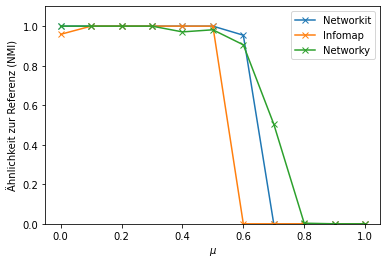

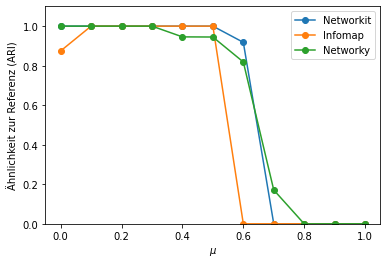

In [10]:
def plotVaryingMus(lin_space):
    print("Plotting diagrams")
    nmis_nk = []
    nmis_im = []
    nmis_ny = []

    aris_nk = []
    aris_im = []
    aris_ny = []

    mus = []

    for mu in lin_space:
        mus.append(mu)
        graph, part = genLFR(1000, mu)

        file_name, file_path = writeGraphAndCommunities(graph, part)

        part_networkit = calculateNetworkitPartition(graph, file_name)
        part_infomap = calculateInfomapPartition(graph, file_name, file_path)
        part_networky = calculateNetworkyPartition(graph, file_name, file_path)

        nmis_nk.append(1.0 - nk.community.NMIDistance().getDissimilarity(graph, part, part_networkit))
        nmis_im.append(1.0 - nk.community.NMIDistance().getDissimilarity(graph, part, part_infomap))
        nmis_ny.append(1.0 - nk.community.NMIDistance().getDissimilarity(graph, part, part_networky))

        aris_nk.append(1.0 - nk.community.AdjustedRandMeasure().getDissimilarity(graph, part, part_networkit))
        aris_im.append(1.0 - nk.community.AdjustedRandMeasure().getDissimilarity(graph, part, part_infomap))
        aris_ny.append(1.0 - nk.community.AdjustedRandMeasure().getDissimilarity(graph, part, part_networky))

    print(nmis_im)

    fig, ax = plt.subplots()
    ax.set_ylim([0, 1.1])
    ax.plot(mus, nmis_nk, "x-", label="Networkit")
    ax.plot(mus, nmis_im, "x-", label="Infomap")
    ax.plot(mus, nmis_ny, "x-", label="Networky")

    ax.set_xlabel("$\mu$")
    ax.set_ylabel("Ähnlichkeit zur Referenz (NMI)")
    ax.legend()

    fig, ax = plt.subplots()
    ax.set_ylim([0, 1.1])
    ax.plot(mus, aris_nk, "o-", label="Networkit")
    ax.plot(mus, aris_im, "o-", label="Infomap")
    ax.plot(mus, aris_ny, "o-", label="Networky")

    ax.set_xlabel("$\mu$")
    ax.set_ylabel("Ähnlichkeit zur Referenz (ARI)")
    ax.legend()

plotVaryingMus(numpy.linspace(0, 1, 11))